# Decision Tree : ทำนาย Citrus
- ส้ม VS. ส้มโอ

![title](../lab06/datasources.png)

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('../lab06/citrus.csv')
df.sample(5)

name  diameter  weight  red  green  blue
7348  grapefruit     11.35  196.08  139     78    19
8438  grapefruit     12.08  206.84  145     94     8
2317      orange      8.38  150.97  161     95    15
1221      orange      7.63  139.89  174     75     2
445       orange      6.80  127.51  161     87     4

In [4]:
# preprocess
df['type'] = np.where(df['name']=='orange',1,0)

In [5]:
X = df.drop(columns='name')
X = X.drop(columns='type')
y = df['type']

In [6]:
X.sample(5)

diameter  weight  red  green  blue
4304      9.82  173.56  149     88    10
589       6.98  131.13  165     91     2
6257     10.67  184.44  158     65    21
1291      7.68  140.64  150     71     2
9374     12.90  219.27  151     64    24

In [7]:
y.sample(5)

1196    1
5782    0
842     1
7873    0
6587    0
Name: type, dtype: int64

In [38]:
df[df['name']=='orange']['blue'].mean()

7.1152

In [39]:
df[df['name']=='grapefruit']['blue'].mean()

15.6112

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
 X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

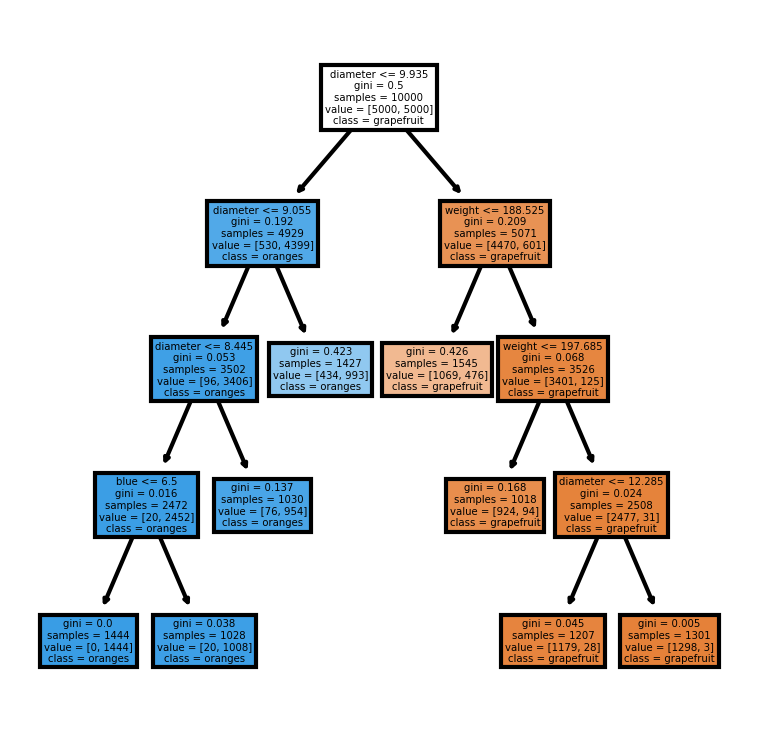

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=42,max_depth=8, min_samples_leaf=0.10,).fit(X, y)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)

fn = ['diameter','weight','red','green','blue']
cn = ['grapefruit','oranges']
tree.plot_tree(clf,
           feature_names = fn, 
           class_names=cn,
           filled = True);

# การทดสอบ

In [62]:
c = clf.predict(X_test)
c

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
(c ^ y_test).sum()  # ^ xor ของสองตัวแปร

325

In [64]:
from sklearn.metrics import accuracy_score
score = accuracy_score(c, y_test)
score

0.8916666666666667

In [65]:
len(y_test) , len(c)

(3000, 3000)

In [66]:
1-(325/3000)

0.8916666666666666